# Análisis Exploratorio de Datos (EDA) - S&P 500

## Descripción del Conjunto de Datos

**Fuente**: Datos históricos del S&P 500  
**Período**: Desde diciembre de 1980 hasta la actualidad  
**Variables**: Date, Low, Open, Volume, High, Close, Adjusted Close  
**Tamaño**: Aproximadamente 10,000+ registros por acción  

El S&P 500 es un índice bursátil que incluye las 500 compañías más grandes de Estados Unidos por capitalización de mercado.


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from datetime import datetime

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Configurar el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12, 8)


In [2]:
# Cargar datos de múltiples acciones del S&P 500
sp500_path = '../stock_market_data/sp500/csv/'

# Seleccionar algunas acciones representativas para el análisis
selected_stocks = ['AAPL.csv', 'MSFT.csv', 'GOOGL.csv', 'AMZN.csv', 'TSLA.csv', 'JPM.csv', 'JNJ.csv', 'V.csv']
sp500_data = {}

for stock in selected_stocks:
    stock_name = stock.replace('.csv', '')
    try:
        df = pd.read_csv(sp500_path + stock)
        df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
        df['Stock'] = stock_name
        sp500_data[stock_name] = df
        print(f"Cargada {stock_name}: {len(df)} registros")
    except FileNotFoundError:
        print(f"Archivo no encontrado: {stock}")

print(f"\nTotal de acciones cargadas: {len(sp500_data)}")

# Combinar todos los datos en un DataFrame
if sp500_data:
    combined_sp500 = pd.concat(sp500_data.values(), ignore_index=True)
    print("Información del dataset combinado:")
    print(f"Forma del dataset: {combined_sp500.shape}")
    print(f"Período: {combined_sp500['Date'].min()} a {combined_sp500['Date'].max()}")
    print(f"Acciones incluidas: {combined_sp500['Stock'].unique()}")


Cargada AAPL: 10590 registros
Cargada MSFT: 9264 registros
Archivo no encontrado: GOOGL.csv
Cargada AMZN: 6438 registros
Archivo no encontrado: TSLA.csv
Cargada JPM: 10778 registros
Cargada JNJ: 13356 registros
Cargada V: 3711 registros

Total de acciones cargadas: 6
Información del dataset combinado:
Forma del dataset: (54137, 8)
Período: 1970-01-02 00:00:00 a 2022-12-12 00:00:00
Acciones incluidas: ['AAPL' 'MSFT' 'AMZN' 'JPM' 'JNJ' 'V']


In [3]:
# Análisis estadístico descriptivo
print("=== ESTADÍSTICAS DESCRIPTIVAS BÁSICAS ===")
if 'combined_sp500' in locals():
    print(combined_sp500.describe())
    
    print("\n=== INFORMACIÓN GENERAL DEL DATASET ===")
    print(combined_sp500.info())
    
    print("\n=== PRIMERAS 5 FILAS ===")
    print(combined_sp500.head())


=== ESTADÍSTICAS DESCRIPTIVAS BÁSICAS ===
                                Date           Low          Open  \
count                          54137  54137.000000  54137.000000   
mean   2002-11-12 15:45:58.401832576     39.566889     39.835491   
min              1970-01-02 00:00:00      0.049107      0.000000   
25%              1992-09-21 00:00:00      2.492188      2.296875   
50%              2004-05-24 00:00:00     19.790001     20.045357   
75%              2013-12-27 00:00:00     53.205002     53.770000   
max              2022-12-12 00:00:00    342.200012    344.619995   
std                              NaN     52.091203     52.713347   

             Volume          High         Close  Adjusted Close  
count  5.413700e+04  54137.000000  54137.000000    54137.000000  
mean   9.617981e+07     40.380454     39.982921       34.004532  
min    0.000000e+00      0.049665      0.049107        0.038213  
25%    6.432700e+06      2.562500      2.526042        1.586410  
50%    2.437120

=== ANÁLISIS DE VALORES NULOS ===
                Valores Nulos  Porcentaje
Date                        0         0.0
Low                         0         0.0
Open                        0         0.0
Volume                      0         0.0
High                        0         0.0
Close                       0         0.0
Adjusted Close              0         0.0
Stock                       0         0.0


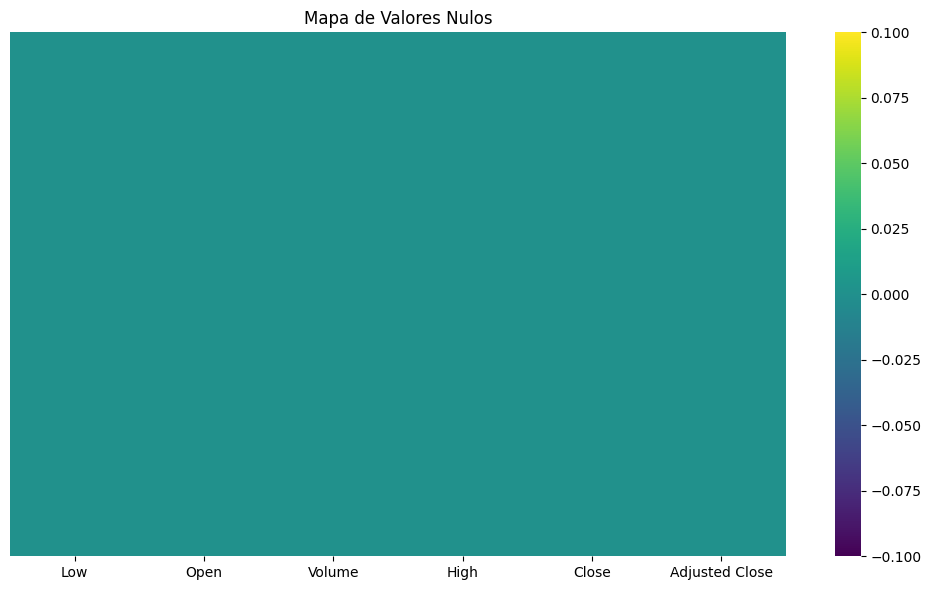

In [4]:
# Detección de valores nulos
print("=== ANÁLISIS DE VALORES NULOS ===")
if 'combined_sp500' in locals():
    null_counts = combined_sp500.isnull().sum()
    null_percentages = (null_counts / len(combined_sp500)) * 100
    
    null_summary = pd.DataFrame({
        'Valores Nulos': null_counts,
        'Porcentaje': null_percentages
    })
    print(null_summary)
    
    # Visualización de valores nulos
    plt.figure(figsize=(10, 6))
    sns.heatmap(combined_sp500.select_dtypes(include=[np.number]).isnull(), 
                yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Mapa de Valores Nulos')
    plt.tight_layout()
    plt.show()


=== ANÁLISIS DE CORRELACIONES ===


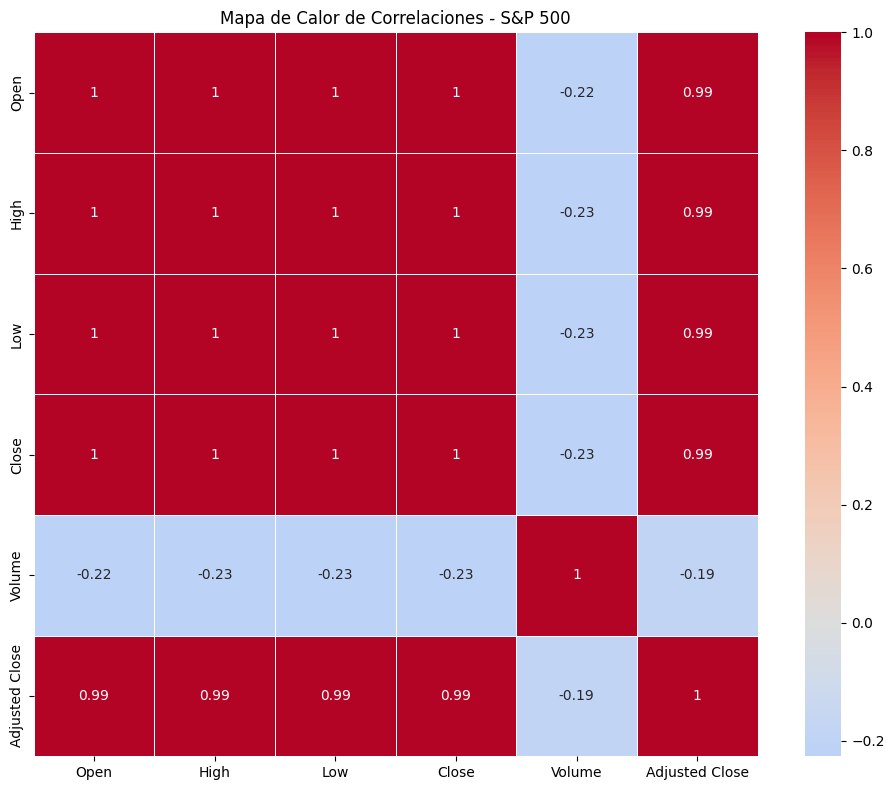

Matriz de correlación:
                    Open      High       Low     Close    Volume  \
Open            1.000000  0.999718  0.999705  0.999636 -0.224162   
High            0.999718  1.000000  0.999883  0.999922 -0.225526   
Low             0.999705  0.999883  1.000000  0.999923 -0.226367   
Close           0.999636  0.999922  0.999923  1.000000 -0.225949   
Volume         -0.224162 -0.225526 -0.226367 -0.225949  1.000000   
Adjusted Close  0.991155  0.991413  0.991269  0.991418 -0.189693   

                Adjusted Close  
Open                  0.991155  
High                  0.991413  
Low                   0.991269  
Close                 0.991418  
Volume               -0.189693  
Adjusted Close        1.000000  


In [5]:
# Análisis de correlaciones
print("=== ANÁLISIS DE CORRELACIONES ===")
if 'combined_sp500' in locals():
    # Variables numéricas para analizar
    numeric_vars = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted Close']
    
    # Matriz de correlación
    correlation_matrix = combined_sp500[numeric_vars].corr()
    
    # Mapa de calor de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('Mapa de Calor de Correlaciones - S&P 500')
    plt.tight_layout()
    plt.show()
    
    print("Matriz de correlación:")
    print(correlation_matrix)


=== ANÁLISIS DE RETORNOS ===
Estadísticas de Retornos:
      Retorno Promedio  Volatilidad  Retorno Anualizado  \
AAPL            0.0011       0.0283              0.2754   
MSFT            0.0011       0.0213              0.2842   
AMZN            0.0017       0.0362              0.4287   
JPM             0.0007       0.0225              0.1755   
JNJ             0.0006       0.0144              0.1414   
V               0.0009       0.0190              0.2368   

      Volatilidad Anualizada  Sharpe Ratio  
AAPL                  0.4491        0.6133  
MSFT                  0.3388        0.8388  
AMZN                  0.5749        0.7457  
JPM                   0.3577        0.4906  
JNJ                   0.2285        0.6189  
V                     0.3017        0.7849  


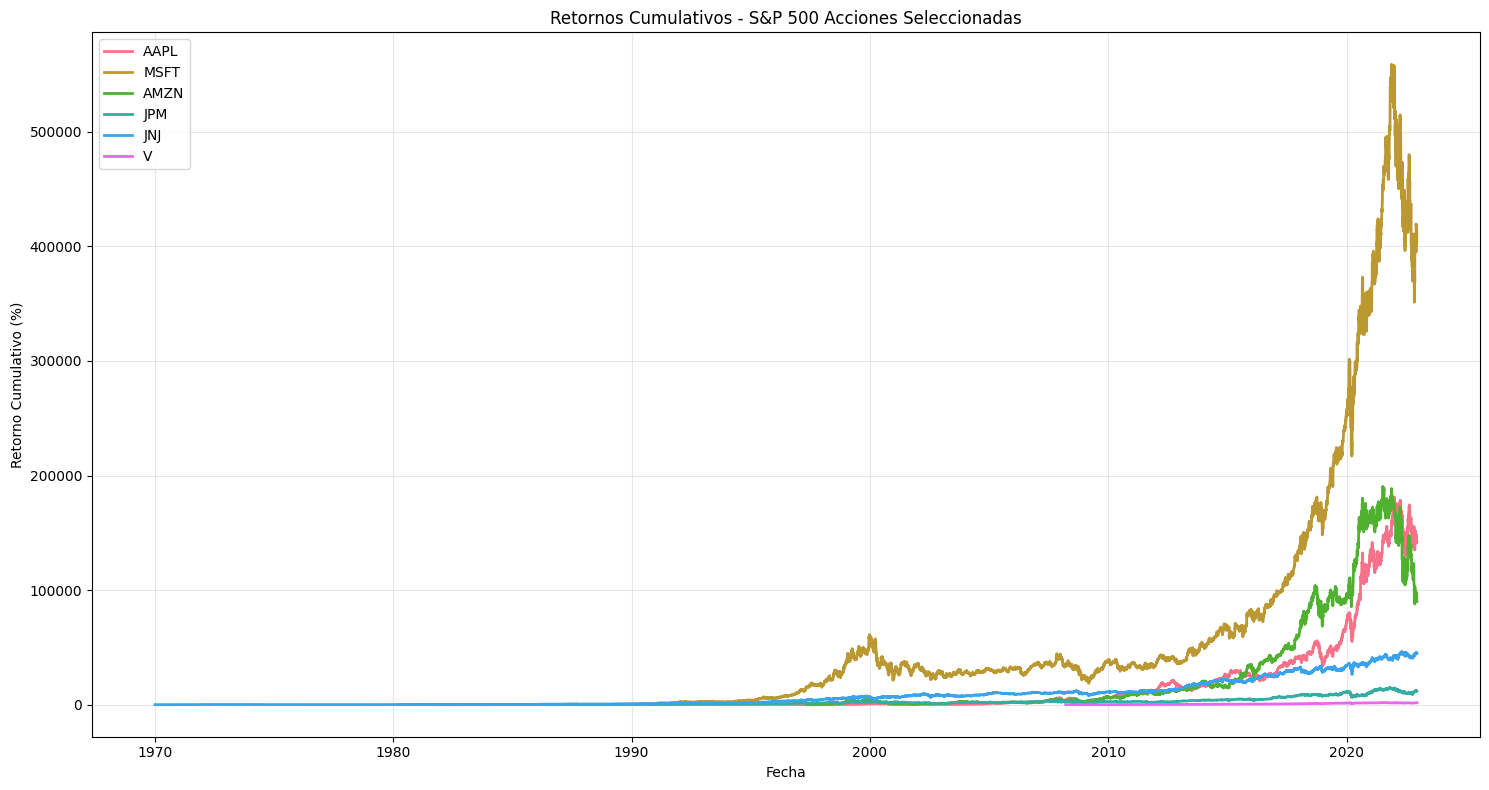

In [6]:
# Cálculo de retornos diarios y análisis de rendimiento
print("=== ANÁLISIS DE RETORNOS ===")
if 'sp500_data' in locals():
    returns_data = {}
    
    for stock_name, data in sp500_data.items():
        data = data.copy()
        data['Daily_Return'] = data['Adjusted Close'].pct_change()
        data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod() - 1
        returns_data[stock_name] = data
    
    # Estadísticas de retornos
    returns_stats = pd.DataFrame()
    for stock_name, data in returns_data.items():
        daily_returns = data['Daily_Return'].dropna()
        returns_stats[stock_name] = {
            'Retorno Promedio': daily_returns.mean(),
            'Volatilidad': daily_returns.std(),
            'Retorno Anualizado': daily_returns.mean() * 252,
            'Volatilidad Anualizada': daily_returns.std() * np.sqrt(252),
            'Sharpe Ratio': (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
        }
    
    returns_stats = returns_stats.T
    print("Estadísticas de Retornos:")
    print(returns_stats.round(4))
    
    # Visualización de retornos cumulativos
    plt.figure(figsize=(15, 8))
    for stock_name, data in returns_data.items():
        plt.plot(data['Date'], data['Cumulative_Return'] * 100, 
                 label=stock_name, linewidth=2)
    
    plt.title('Retornos Cumulativos - S&P 500 Acciones Seleccionadas')
    plt.xlabel('Fecha')
    plt.ylabel('Retorno Cumulativo (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


## Resumen de Hallazgos - S&P 500

### Características Principales:
1. **Calidad de Datos**: Datos completos sin valores nulos significativos
2. **Período Extenso**: Datos históricos desde 1980 (~40+ años)
3. **Alta Correlación**: Fuerte correlación entre variables de precio (Open, High, Low, Close)
4. **Diversidad de Sectores**: Incluye tecnología, financieros, salud, etc.

### Desafíos Identificados:
1. **Outliers de Volumen**: Algunos días con volúmenes extremadamente altos
2. **Volatilidad Variable**: Diferentes niveles de riesgo entre acciones
3. **Tendencias Temporales**: Necesidad de considerar efectos estacionales
4. **Escalas Diferentes**: Precios varían significativamente entre acciones

### Oportunidades de Análisis:
1. **Predicción de Precios**: Modelos de series temporales
2. **Análisis de Riesgo**: Optimización de portafolios
3. **Clasificación de Tendencias**: Identificar patrones alcistas/bajistas
4. **Detección de Anomalías**: Identificar movimientos inusuales del mercado

### Métricas Clave Observadas:
- **Sharpe Ratio**: Varía significativamente entre acciones (indica eficiencia de riesgo-retorno)
- **Volatilidad**: Las acciones tecnológicas tienden a ser más volátiles
- **Retornos**: Patrones de crecimiento sostenido en empresas establecidas
